<a href="https://colab.research.google.com/github/mengcius/pytorch-learn/blob/master/7_%E7%BB%9F%E8%AE%A1%E5%B1%9E%E6%80%A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7.统计属性

norm 范数

max/min/argmin/argmax 最大/小值及其位置

mean/sum/prod 均值/和/乘积

keepdim 输出保持维度

topk/kthvalue 前几大/第几小的值及位置

比较运算


### norm 范数
norm 指范数，区分以下几个概念：

normalize 正则化、标准化，如batch_norm

matrix norm 矩阵范数

vector norm 向量范数


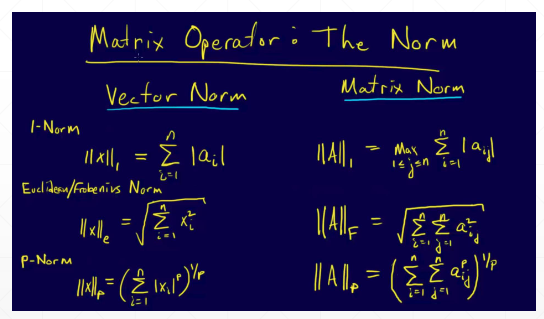

In [0]:
import torch

In [8]:
a=torch.full([8],1) #向量
b=a.view(2,4) #矩阵
c=a.view(2,2,2) #矩阵
b

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [9]:
c

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

In [10]:
a.norm(1),b.norm(1),c.norm(1) #范数都为1，1的范数为所有元素绝对值之和

(tensor(8.), tensor(8.), tensor(8.))

In [11]:
a.norm(2),b.norm(2),c.norm(2) #2范数，所有元素绝对值的平方之和，再开根号

(tensor(2.8284), tensor(2.8284), tensor(2.8284))

In [12]:
b.norm(1,dim=1),b.norm(2,dim=1) #对某维度做范数，第一个参数是批范数，第二参数是第几维度

(tensor([4., 4.]), tensor([2., 2.]))

In [13]:
c.norm(1,dim=0) #消掉了第0维

tensor([[2., 2.],
        [2., 2.]])

In [43]:
c.norm(1,dim=2)

tensor([[2., 2.],
        [2., 2.]])

In [14]:
c.norm(2,dim=0)

tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])

### max/min/argmax/argmin 最大/小值及其位置

In [18]:
a=torch.arange(8).view(2,4).float()
a

tensor([[0., 1., 2., 3.],
        [4., 5., 6., 7.]])

In [23]:
a.max(),a.min() #最大值，最小值

(tensor(7.), tensor(0.))

In [24]:
a.argmax(),a.argmin() #最大值的位置，最小值的位置，这个位置是把tensor展开后的索引

(tensor(7), tensor(0))

In [74]:
b=torch.rand(2,3,4)
b

tensor([[[0.6167, 0.4856, 0.6627, 0.2452],
         [0.9823, 0.9273, 0.1527, 0.8079],
         [0.8636, 0.2244, 0.3796, 0.7682]],

        [[0.7121, 0.3076, 0.9650, 0.1044],
         [0.4546, 0.9258, 0.7367, 0.8671],
         [0.6584, 0.0765, 0.2301, 0.4632]]])

In [75]:
b.max(),b.argmax()

(tensor(0.9823), tensor(4))

In [76]:
b.max(dim=1)

torch.return_types.max(values=tensor([[0.9823, 0.9273, 0.6627, 0.8079],
        [0.7121, 0.9258, 0.9650, 0.8671]]), indices=tensor([[1, 1, 0, 1],
        [0, 1, 0, 1]]))

In [38]:
b.argmax(dim=0) #某维度下的最大值的位置，在此维度下的对应部分做比较

tensor([[1, 1, 1, 0],
        [1, 1, 1, 1],
        [1, 0, 1, 0]])

In [77]:
b.argmax(dim=1)

tensor([[1, 1, 0, 1],
        [0, 1, 0, 1]])

In [78]:
b.argmax(dim=2)

tensor([[2, 0, 0],
        [2, 1, 0]])

### mean/sum/prod 均值/和/乘积

In [47]:
a=torch.arange(8).view(2,4).float()
a

tensor([[0., 1., 2., 3.],
        [4., 5., 6., 7.]])

In [48]:
a.mean(),a.sum() #均值，和

(tensor(3.5000), tensor(28.))

In [26]:
a.prod() #累乘，乘积，product

tensor(0.)

In [53]:
a.mean(dim=0),a.sum(dim=1),a.prod(dim=0) #某维度上

(tensor([2., 3., 4., 5.]), tensor([ 6., 22.]), tensor([ 0.,  5., 12., 21.]))

### keepdim 输出保持维度


In [57]:
a=torch.randn(8).view(2,4).float() #比如它是神经网络的预测，想要找到2张图的预测值
a

tensor([[-2.0132, -0.1581,  0.2038, -0.5052],
        [ 0.4008,  0.5014, -1.5073,  0.7564]])

In [71]:
a.max(dim=1) #max加维度，返回最大值和它的位置，argmax是它的一部分，

torch.return_types.max(values=tensor([0.2038, 0.7564]), indices=tensor([2, 3]))

In [69]:
a.max(dim=1,keepdim=True) #keepdim使此dim=1以外的其他维度不变，即保持维度不变

torch.return_types.max(values=tensor([[0.2038],
        [0.7564]]), indices=tensor([[2],
        [3]]))

In [83]:
a.max(dim=0)

torch.return_types.max(values=tensor([0.4008, 0.5014, 0.2038, 0.7564]), indices=tensor([1, 1, 0, 1]))

In [80]:
a.max(dim=0,keepdim=True)

torch.return_types.max(values=tensor([[0.4008, 0.5014, 0.2038, 0.7564]]), indices=tensor([[1, 1, 0, 1]]))

In [72]:
a.argmax(dim=1) #只返回位置

tensor([2, 3])

In [65]:
a.argmax(dim=1,keepdim=True) #还是2维，找到了两张图的判断类别的索引

tensor([[2],
        [3]])

In [86]:
a.argmax(dim=0).shape

torch.Size([4])

In [87]:
a.argmax(dim=0,keepdim=True).shape #还是2维的，和以前一样

torch.Size([1, 4])

### topk/kthvalue 前几大/第几小

topk 取前k个最大的值及位置，用在取预测概率前k大的类别，和Top-5 ACC一样

kthvalue 取第k小的值及位置，只能是小

In [91]:
a=torch.arange(15).view(3,5)
a

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

In [92]:
a.topk(3,dim=1) #取此维度下的前3个最大的值，以及他们的在此维度上的索引，最大的在前面

torch.return_types.topk(values=tensor([[ 4,  3,  2],
        [ 9,  8,  7],
        [14, 13, 12]]), indices=tensor([[4, 3, 2],
        [4, 3, 2],
        [4, 3, 2]]))

In [93]:
a.topk(3,dim=1,largest=False) #前3个最小的值，最小的在前面，此维度之外的其他维度不变

torch.return_types.topk(values=tensor([[ 0,  1,  2],
        [ 5,  6,  7],
        [10, 11, 12]]), indices=tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]))

In [96]:
a.kthvalue(1,dim=1) #第1小的值及位置

torch.return_types.kthvalue(values=tensor([ 0,  5, 10]), indices=tensor([0, 0, 0]))

### 比较运算

==，!=，>，>=，<，<=  对tensor中每个元素做运算

torch.eq(a, b) 比较元素是否相等

torch.equal(a, b) 比较整个tensor是否相等


In [0]:
a=torch.arange(8).view(2,4).float()

In [109]:
a>0 #真为1，假为0

tensor([[0, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.uint8)

In [110]:
a!=1

tensor([[1, 0, 1, 1],
        [1, 1, 1, 1]], dtype=torch.uint8)

In [111]:
b=torch.randn(8).view(2,4)
b.type()

'torch.FloatTensor'

In [112]:
torch.eq(a,b) #比较元素是否相等

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.uint8)

In [113]:
torch.equal(a,b) #比较整个tensor是否相等

False